# Dataset Demo

Data generated from X-Plane 11 consist of:
 - video.avi
 - data.pkl
 - calibration.txt

This notebook aims to demonstrate the usage of `utils.dataset.aircraft_camera_data` to load and retrieve information from said generated data.

In [1]:
from utils.dataset import aircraft_camera_data

In [2]:
t = 1 # Time - 5
w = 5 # Weather - 5
r = 1 # Runs - 3

data_indexes = [1,2] # Camera 1 & 2
touchdown_target_lat_lon = [1.3541354199301814, 103.97961848373048] # WSSS 02L Runway
dataset_directory = "/media/gabriel/DATA/dataset"
data_sources = [[f'{dataset_directory}/t{t}/r{r}/w{w}/{data_index}/data.pkl', f'{dataset_directory}/t{t}/r{r}/w{w}/{data_index}/video.avi'] for data_index in data_indexes]

In [3]:
# Dataset Class Initialization
acd = aircraft_camera_data(data_sources = data_sources, touchdown_target_lat_lon = touchdown_target_lat_lon)

# Video Frame Related Operations

`aircraft_camera_data.get_frame_from_video()` method is the main frame retriever. This function have 2 modes:
 - **single frame**, where the input is the frame index.
 - **batched frames**, where the input is the batch index.

Total batch can be retrieved using `get_total_batch()` and batch index can be any number less than the total batch.

Frames can be visualized using `viz_data()` method which takes frame index as input.

In [4]:
# Retrieving a single frame
n = 4500
imgs = acd.get_frame_from_video(n)
imgs.shape

torch.Size([1, 2, 1080, 1920, 3])

In [5]:
# Retrieve Total Batch
print(acd.get_total_batch(data_index = 0, batch_size = 64)) # data_index 0 -> camera 1, 1 -> camera 2

94


In [6]:
# Retriving Batched Frame
batch_index = 93 # batch_index 0 -> frame 0-63
imgs = acd.get_frame_from_video(batch_index, batch_size = 64)
print(imgs.shape)

torch.Size([64, 2, 1080, 1920, 3])


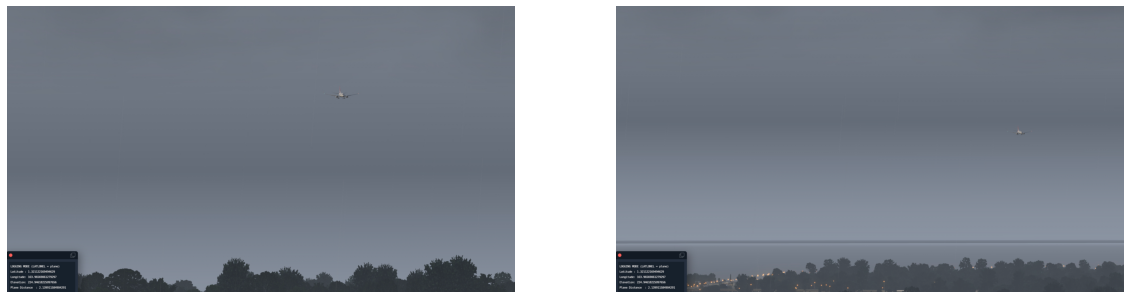

In [7]:
# Visualize Frame
n = 4500
fig, ax = acd.vis_frame(n)

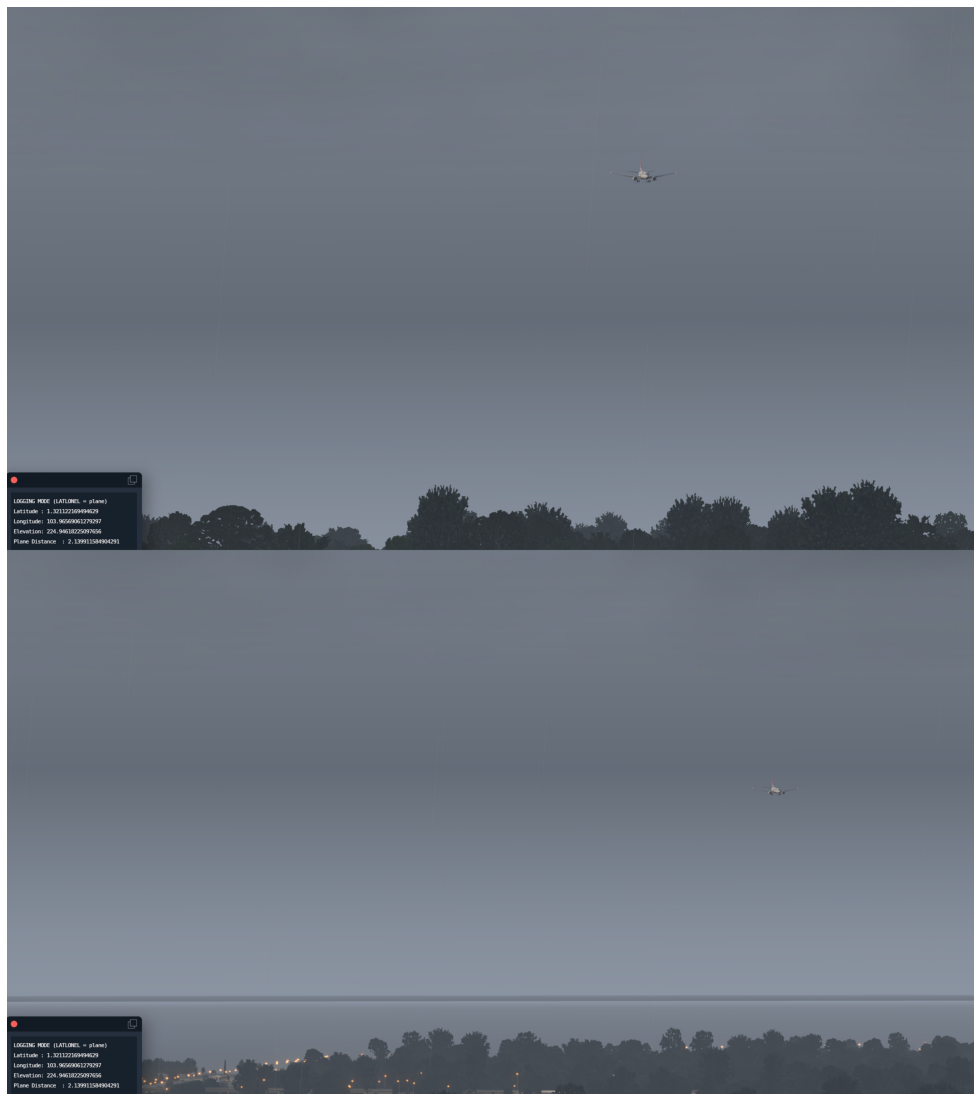

In [8]:
# Or if stacked images are prefered
fig, ax = acd.vis_frame(n, stacked = True)

# Distance-to-Touchdown

Distance to touchdown can be computed using `aircraft_camera_data.compute_dtt()` method.

In [9]:
# Computing DTT
acd.compute_dtt()

100%|█████████████████████████████████████████████████████████| 6016/6016 [00:02<00:00, 2990.13it/s]


array([[9.55679922, 9.55679922],
       [9.55534909, 9.55534909],
       [9.55372624, 9.55372624],
       ...,
       [0.19686601, 0.19686601],
       [0.195796  , 0.195796  ],
       [0.19490407, 0.19490407]])